In [3]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [46]:
arizona = ZipFile('az2020.pl.zip')
import csv
import codecs

with codecs.open('geolabels.csv',encoding='latin-1') as file:
    geolabels = list(csv.reader(file))[0]
with arizona.open('azgeo2020.pl','r') as file:
    geo = pd.read_csv(file,sep='|',index_col=False,encoding='latin-1',names=geolabels, keep_default_na=False)
with codecs.open('pl1labels.csv',encoding='utf-8') as file:
    pl1labels = list(csv.reader(file))[0]
with arizona.open('az000012020.pl','r') as file:
    az1 = pd.read_csv(file,sep='|',index_col=False,encoding='utf-8',names=pl1labels, keep_default_na=False)
    
with codecs.open('pl2labels.csv',encoding='latin-1') as file:
    pl2labels = list(csv.reader(file))[0]    
with arizona.open('az000022020.pl','r') as file:
    az2 = pd.read_csv(file,sep='|',index_col=False,encoding='latin-1',names=pl2labels, keep_default_na=False)
    
with codecs.open('pl3labels.csv',encoding='latin-1') as file:
    pl3labels = list(csv.reader(file))[0]    
with arizona.open('az000032020.pl','r') as file:
    az3 = pd.read_csv(file,sep='|',index_col=False,encoding='latin-1',names=pl3labels, keep_default_na=False)    

c:\users\patri\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3,9,14,16,17,19,26,27,28,29,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,62,67,72,77,80,81,82,86,96) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [246]:
census_data = pd.concat([geo, az1, az2, az3],axis=1)
alignment_cols = 'COUNTY TRACT BLKGRP'.split()
census_data[alignment_cols] = census_data[alignment_cols].apply(lambda x: pd.to_numeric(x, downcast='integer'))

In [48]:
# How many block groups contain a block?
blocks = census_data[(census_data['SUMLEV']==750) ]
groups = census_data[census_data['SUMLEV']==150]
blkgrp = set([ '%03d %06d %d' % (int(c), int(a),int(b)) for a,b,c in zip(blocks['TRACT'],blocks['BLKGRP'],blocks['COUNTY'])])
# blkgrp = set([ (c, a,b) for a,b,c in zip(blocks['TRACT'],blocks['BLKGRP'],blocks['COUNTY'])])
geoids = set([ groups[ (groups['TRACT']=='%06d' % int(a)) & (groups['COUNTY']=='%03d' % int(c)) & (groups['BLKGRP']=='%d'%int(b))].iloc[0]['GEOID'] for a,b,c in zip(blocks['TRACT'],blocks['BLKGRP'],blocks['COUNTY'])])
print(len(blkgrp))
print(len(geoids))

4773
4773


In [ ]:
# How many State-County-Voting District/Remainder-County Subdivision-Place/Remainder-Census Tract-Block Group are there?
blkgrp2 = census_data[census_data['SUMLEV']==740]
# blkgrpset = set([ '%03d %06d %d' % (int(c), int(a),int(b)) for a,b,c in zip(blkgrp2['TRACT'],blkgrp2['BLKGRP'],blkgrp2['COUNTY'])])
# blkgrpset = set([ (c, a,b) for a,b,c in zip(blkgrp2['TRACT'],blkgrp2['BLKGRP'],blkgrp2['COUNTY'])])
blkgrpset = set([ (int(c), int(a),int(b)) for a,b,c in zip(blkgrp2['TRACT'],blkgrp2['BLKGRP'],blkgrp2['COUNTY'])])
print(len(blkgrpset))
print(len(blkgrp2))
blkgrpset

In [ ]:
sorted(set([ (c, a,b) for a,b,c in zip(blkgrp2['TRACT'],blkgrp2['BLKGRP'],blkgrp2['COUNTY'])]), key=lambda x: int(x[1]))

In [ ]:
# How many block groups are there?
blkgrp2 = census_data[census_data['SUMLEV']==150]
blkgrpset2 = set([ '%s %s %s' % (c, a,b) for a,b,c in zip(blkgrp2['TRACT'],blkgrp2['BLKGRP'],blkgrp2['COUNTY'])])
print(len(blkgrpset2))
print(len(blkgrp2))
blkgrpset2

In [ ]:
sorted(list(blocks.iterrows()), key=lambda x: x['COUNTY'])


In [247]:
block_data = census_data[census_data['SUMLEV']==750]
group_data = census_data[census_data['SUMLEV']==150]
# This is stupid
# block_data = block_data.astype({'COUNTY': int, 'TRACT': int, 'BLKGRP': int})
# group_data = group_data.astype({'COUNTY': int, 'TRACT': int, 'BLKGRP': int})
nonnumeric_cols = 'COUNTY COUSUB PLACE AIANHH AITS AIHHTLI SDELM SDSEC SDUNI MEMI CSA METDIV CBSAPCI'
tract_class_cols = {c:{a:b for b,a in enumerate(set(block_data[c]))} for c in nonnumeric_cols.split()}
print('N=', len(group_data))
cols = 1

N= 4773


In [249]:
block_data = census_data[census_data['SUMLEV']==750]
group_data = census_data[census_data['SUMLEV']==150]
# This is stupid
# block_data = block_data.astype({'COUNTY': int, 'TRACT': int, 'BLKGRP': int})
# group_data = group_data.astype({'COUNTY': int, 'TRACT': int, 'BLKGRP': int})
nonnumeric_cols = 'COUNTY COUSUB PLACE AIANHH AITS AIHHTLI SDELM SDSEC SDUNI MEMI CSA METDIV CBSAPCI'
tract_class_cols = {c:{a:b for b,a in enumerate(set(block_data[c]))} for c in nonnumeric_cols.split()}
print('N=', len(group_data))
cols = 1
for cname, c in tract_class_cols.items():
    print(cname,len(c))
    cols += len(c)
print('D=', cols)
    
def row_length():
    idx = 0
    # Classifications
    for c,dc in tract_class_cols.items():
        idx += len(dc)
    # Geographic numerics
    idx += 4
    # Demographics
    # All
    idx += 8
    # Hispanic
    idx += 9
    # 18+
    idx += 9
    # Hispanic
    idx += 9 
    # Housing
    # Group quarters
    idx += 9
    return idx

def row_titles():
    titles = []
    # Classifications
    for c,dc in tract_class_cols.items():
        for dcname in dc:
            titles.append(c + ' ' + str(dcname))
            
    # Geographic numerics
    titles.extend(['AREA', 'POP DENSITY', 'HOUSING DENSITY', 'LATITUDE', 'LONGITUDE'])
    # Demographics
    # All
    titles.extend(['% WHITE', '% BLACK', '% INDIAN', '% ASIAN', '% PI/AK', '% OTHER', '% TWO'])
    # Hispanic
    titles.extend(['% HISPANIC', '% WHITE (HISP)', '% BLACK (HISP)', '% INDIAN (HISP)', '% ASIAN (HISP)', '% PI/AK (HISP)', '% OTHER (HISP)', '% TWO (HISP)'])
    # 18+
    titles.extend(['% 18+', '% WHITE (18+)', '% BLACK (18+)', '% INDIAN (18+)', '% ASIAN (18+)', '% PI/AK (18+)', '% OTHER (18+)', '% TWO (18+)'])
    # Hispanic
    titles.extend(['% HISPANIC&18+', '% WHITE (HISP&18+)', '% BLACK (HISP&18+)', '% INDIAN (HISP&18+)', '% ASIAN (HISP&18+)', '% PI/AK (HISP&18+)', '% OTHER (HISP&18+)', '% TWO (HISP&18+)'])
    # Housing
    # Group quarters
    titles.extend(['% CORRECTIONAL', '% JUVENILE', '% NURSING', '% OTHER GROUP1', '% COLLEGE', '% MILITARY', '% OTHER GROUP2'])
    return titles

def title_types():
    titles = {}
    # Classifications
    for c,dc in tract_class_cols.items():
        for dcname in dc:
            titles[c + ' ' + str(dcname)]= 'BOOL'
    nums = [] 
    # Geographic numerics
    nums.extend(['AREA', 'POP DENSITY', 'HOUSING DENSITY', 'LATITUDE', 'LONGITUDE'])
    for n in nums:
        titles[n] = 'NUM'
    nums = []
    # Demographics
    # All
    nums.extend(['% WHITE', '% BLACK', '% INDIAN', '% ASIAN', '% PI/AK', '% OTHER', '% TWO'])
    # Hispanic
    nums.extend(['% HISPANIC', '% WHITE (HISP)', '% BLACK (HISP)', '% INDIAN (HISP)', '% ASIAN (HISP)', '% PI/AK (HISP)', '% OTHER (HISP)', '% TWO (HISP)'])
    # 18+
    nums.extend(['% 18+', '% WHITE (18+)', '% BLACK (18+)', '% INDIAN (18+)', '% ASIAN (18+)', '% PI/AK (18+)', '% OTHER (18+)', '% TWO (18+)'])
    # Hispanic
    nums.extend(['% HISPANIC&18+', '% WHITE (HISP&18+)', '% BLACK (HISP&18+)', '% INDIAN (HISP&18+)', '% ASIAN (HISP&18+)', '% PI/AK (HISP&18+)', '% OTHER (HISP&18+)', '% TWO (HISP&18+)'])
    # Housing
    # Group quarters
    nums.extend(['% CORRECTIONAL', '% JUVENILE', '% NURSING', '% OTHER GROUP1', '% COLLEGE', '% MILITARY', '% OTHER GROUP2'])
    
    for n in nums:
        titles[n] = 'PCT'
    
    return titles    


def get_info(blocks):
    row_info = np.zeros(row_length())
#     blocks = census_data[(census_data['SUMLEV']==750) & (census_data['BLKGRP']==blk['BLKGRP']) & (census_data['TRACT']==blk['TRACT'])]
    total_pop = 0
    rts = row_titles()
    for _,blk in blocks.iterrows():
        row_data = np.zeros( row_length())
        idx = 0
        # Classifications
        block_pop = blk['POP100']  
        total_pop += block_pop
        for c,dc in tract_class_cols.items():
    #         print(idx, ': ', c)
            assert rts[idx + dc[blk[c]]] == c + ' ' + str(blk[c]), (rts[idx + dc[blk[c]]], c + ' ' + str(blk[c]))
            row_data[idx+dc[blk[c]]] = 1
            idx += len(dc)

        # Geographic numerics
        block_area = blk['AREALAND']+blk['AREAWATR']
        row_data[idx] += blk['AREALAND'] / block_area # % land

        row_data[idx+1] = block_pop / block_area # pop density
        block_dens = block_pop / block_area
        row_data[idx+2] = blk['HU100'] / max(1,blk['POP100']) # housing density
        row_data[idx+3] = blk['INTPTLAT']
        row_data[idx+4] = blk['INTPTLON']
        if row_data[idx+4] < -1000:
            print('wtf')
            print(blk)
    #     print(idx)
        idx += 4
        # Demographics
        # All
        block_pop = max(1,blk['P0010001'])
        row_data[idx+1] = blk['P0010003']  / block_pop # % white
        row_data[idx+2] = blk['P0010004']  / block_pop # % black
        row_data[idx+3] = blk['P0010005']  / block_pop # % indian/native
        row_data[idx+4] = blk['P0010006']  / block_pop # % asian
        row_data[idx+5] = blk['P0010007']  / block_pop # % island
        row_data[idx+6] = blk['P0010008']  / block_pop # % other
        row_data[idx+7] = blk['P0010010']  / block_pop # % two
        row_data[idx+8] = (blk['P0010009']-blk['P0010010'])  / block_pop # % >2
        idx += 8
    #     print(idx)
        # Hispanic
        hisp_pop = blk['P0020003']
        row_data[idx+1] = hisp_pop  / block_pop # % hispanic
        if hisp_pop == 0:
            hisp_pop = 1
        row_data[idx+2] = blk['P0020005']  / hisp_pop # % white
        row_data[idx+3] = blk['P0020006']  / hisp_pop # % black
        row_data[idx+4] = blk['P0020007']  / hisp_pop # % indian/native
        row_data[idx+5] = blk['P0020008']  / hisp_pop # % asian
        row_data[idx+6] = blk['P0020009']  / hisp_pop # % island
        row_data[idx+7] = blk['P0020010']  / hisp_pop # % other
        row_data[idx+8] = blk['P0020012']  / hisp_pop # % two
        row_data[idx+9] = (blk['P0020011']-blk['P0020012'])  / hisp_pop # % >2
        idx += 9
    #     print(idx)
        # 18+
        adult_pop = blk['P0030001']
        row_data[idx+1] = adult_pop / block_pop # % adult
        if adult_pop == 0:
            adult_pop = 1
        row_data[idx+2] = blk['P0030003']  / adult_pop # % white
        row_data[idx+3] = blk['P0030004']  / adult_pop # % black
        row_data[idx+4] = blk['P0030005']  / adult_pop # % indian/native
        row_data[idx+5] = blk['P0030006']  / adult_pop # % asian
        row_data[idx+6] = blk['P0030007']  / adult_pop # % island
        row_data[idx+7] = blk['P0030008']  / adult_pop # % other
        row_data[idx+8] = blk['P0030010']  / adult_pop # % two
        row_data[idx+9] = (blk['P0030009']-blk['P0030010'])  / adult_pop # % >2
        idx += 9
    #     print(idx)
        # Hispanic
        hispadult_pop = blk['P0040003']
        row_data[idx+1] = hispadult_pop  / block_pop # % hispanic
        if hispadult_pop == 0:
            hispadult_pop = 1
        row_data[idx+2] = blk['P0040005']  / hispadult_pop # % white
        row_data[idx+3] = blk['P0040006']  / hispadult_pop # % black
        row_data[idx+4] = blk['P0040007']  / hispadult_pop # % indian/native
        row_data[idx+5] = blk['P0040008']  / hispadult_pop # % asian
        row_data[idx+6] = blk['P0040009']  / hispadult_pop # % island
        row_data[idx+7] = blk['P0040010']  / hispadult_pop # % other
        row_data[idx+8] = blk['P0040012']  / hispadult_pop # % two
        row_data[idx+9] = (blk['P0040011']-blk['P0040012'])  / hispadult_pop # % >2
        idx += 9 

        # Housing
        row_data[idx+1] = blk['H0010002'] / max(1,blk['H0010001'])
    #     print(idx)
        # Group quarters
        row_data[idx+2] = blk['P0050003']  / block_pop # % correctional
        row_data[idx+3] = blk['P0050004']  / block_pop # % juvenile
        row_data[idx+4] = blk['P0050005']  / block_pop # % nursing
        row_data[idx+5] = blk['P0050006']  / block_pop # % other
        row_data[idx+6] = blk['P0050008']  / block_pop # % college
        row_data[idx+7] = blk['P0050009']  / block_pop # % military
        row_data[idx+8] = blk['P0050010']  / block_pop # % other
#     print(idx+8)
        row_info += blk['POP100'] * row_data
        
    if total_pop == 0:
        return row_info
    else:
        return row_info / total_pop


def progress_bar(i,n,k):
    print('[%s%d%s] - %10d' % ( '|'*max(0, int(k*i/n)-1), int(10*((k*i)/n % 1)), '.'*(k - max(0, int(k*i/n)-1)), i), end='\r')

N= 4773
COUNTY 15
COUSUB 83
PLACE 472
AIANHH 25
AITS 134
AIHHTLI 4
SDELM 114
SDSEC 19
SDUNI 101
MEMI 4
CSA 4
METDIV 2
CBSAPCI 3
D= 981


In [ ]:
tract_class_cols

In [ ]:
set(group_data2['UR'])

In [ ]:
group_data['GEOCODE']

In [ ]:
row = group_data2.iloc[0]
print(row['POP100'])
print(row['P0040001'])

In [84]:
min(block_data['INTPTLON'])

-114.808168

In [93]:
print(block_data.min())

FILEID      PLST
STUSAB        AZ
SUMLEV       750
GEOVAR         0
GEOCOMP        0
            ... 
P0050006       0
P0050007       0
P0050008       0
P0050009       0
P0050010       0
Length: 372, dtype: object


In [264]:
# numeric_cols = 'AREALAND AREAWATR POP100 HU100 INTPTLAT INTPTLON'
# pop_cols1 = 'P0010001 P0010003 P0010004 P0010005 P0010006 P0010007 P0010008 P0010010 P0010009'
# pop_cols2 = 'P0020001 P0020005 P0020006 P0020007 P0020008 P0020009 P0020010 P0020012 P0020011'
# pop_cols3 =  'P0030001 P0030003 P0030004 P0030005 P0030006 P0030007 P0030008 P0030010 P0030009'
# pop_cols4 =  'P0040001 P0040005 P0040006 P0040007 P0040008 P0040009 P0040010 P0040012 P0040011'

rlen = row_length()
group_mat = np.zeros((group_data.shape[0], rlen))
counties = set(group_data['COUNTY'])
geocode_order = []
populations = []
for c in counties:
    county_blocks = block_data[block_data['COUNTY']==c]
    county_groups = group_data[group_data['COUNTY']==c]
    tracts = set(county_groups['TRACT'])
    for t in tracts:
        tract_blocks = county_blocks[county_blocks['TRACT']==t]
        tract_groups = county_groups[county_groups['TRACT']==t]
        for _,g in tract_groups.iterrows():
            progress_bar(len(geocode_order),len(group_data),50)
            group_blocks = tract_blocks[tract_blocks['BLKGRP']==g['BLKGRP']]
            group_mat[len(geocode_order)] = get_info(group_blocks)
            geocode_order.append(g['GEOCODE'])
            populations.append(g['POP100'])
            if group_mat.min() < -1000:
                print('wtf')
                raise Exception()
            

In [100]:
print(group_blocks['INTPTLON'])
r = get_info(group_blocks)
print(group_blocks)

80923   -111.821310
80924   -111.835042
80925   -111.811408
80926   -111.811175
80927   -111.840779
80928   -111.812237
80929   -111.823307
80930   -111.835030
80931   -111.854719
80932   -111.887966
80933   -111.900770
80934   -111.867673
80935   -111.878172
80936   -111.900377
80937   -111.905886
80938   -111.887349
80939   -111.874800
80940   -111.855570
80941   -111.845164
80942   -111.829929
80943   -111.819699
80944   -111.837164
80945   -111.857355
80946   -111.879025
80947   -111.865705
80948   -111.841593
80949   -111.880477
80950   -111.895880
80951   -111.898571
80952   -111.877868
80953   -111.861954
80954   -111.833677
80955   -111.820563
80956   -111.813338
80957   -111.814823
80958   -111.801072
80959   -111.794022
80960   -111.776213
80961   -111.796545
80962   -111.784901
80963   -111.777362
80964   -111.779974
80965   -111.802001
80966   -111.849295
80967   -111.860458
80968   -111.871010
80969   -111.908556
Name: INTPTLON, dtype: float64
      FILEID STUSAB  SUMLEV G

In [101]:
r.min()

-5256.677762800001

In [267]:
np.savez('arizona_groups', mat=group_mat, geocodes=geocode_order, pop=populations)

In [109]:
if False:
    azgroup = np.load('arizona_groups.npz')
    group_mat = azgroup['mat']
    geocode_order = azgroup['geocodes']
    populations = azgroup['pop']

In [268]:
print(np.isnan(group_mat).sum())
print(np.isinf(group_mat).sum())
group_std = group_mat / np.std(group_mat, axis=0)
print(np.isnan(group_std).sum())
print(np.isinf(group_std).sum())
# group_std[np.isnan(group_std)] = 0
# group_std[np.isinf(group_std)] = 0

0
0
133644
0


c:\users\patri\miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [269]:
group_pops = np.array(populations)
group_codes = np.array(geocode_order)
group_mat_nz = group_mat[group_pops > 0]
print(group_mat_nz.shape)
group_codes_nz = group_codes[group_pops > 0]
group_pops_nz = group_pops[group_pops > 0]

(4755, 1028)


In [270]:
group_nml_nz = (group_mat_nz - np.min(group_mat_nz, axis=0)) / (np.max(group_mat_nz, axis=0) - np.min(group_mat_nz, axis=0))
u,s,vt = np.linalg.svd(group_nml_nz, full_matrices=False)
plt.plot(s)
plt.yscale('log')
plt.show()

c:\users\patri\miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


LinAlgError: SVD did not converge

In [7]:
class Tree:
    def __init__(self, members, population, vector, left=None, right=None, up=None):
        self.members = members
        self.population = population
        self.vector = vector
        self.left = left
        self.right = right
        self.up = up
        self.side = None
    def merge(self, other):
        vector = (self.vector * self.population + other.vector * other.population) / (self.population + other.population)
        up = Tree(self.members.union(other.members), self.population + other.population, vector, left=self, right=other)
        self.up = up
        self.side = 'left'
        other.up = up
        other.side = 'right'
        return up
    def child(self, other):
        if self.left is not None:
            self.left = other
        elif self.right is not None:
            self.right = other
        else:
            raise Exception()
        other.up = self
    def remove(self):
        if self.up is not None:
            if self.side == 'left':
                self.up.left = None
            else:
                self.up.right = None
            if self.up.members == self.members:
                assert self.up.left == None, self.side
                assert self.up.right == None, self.side
                assert self.up.population == self.population
                self.up.remove()
            else:
                self.up.vector = (self.up.population * self.up.vector - self.population * self.vector) / (self.up.population - self.population)
                self.up.members.difference_update(self.members)
                self.up.population -= self.population
            self.side = None
            self.up = None

from multiprocessing import Pool, RawArray
var_dict = {}

def init_worker(populations, pop_shape, matrix, matrix_shape):
    var_dict['populations'] = populations
    var_dict['pop_shape'] = pop_shape
    var_dict['matrix'] = matrix
    var_dict['matrix_shape'] = matrix_shape
    
def worker_func(tup):
    populations = np.frombuffer(var_dict['populations']).reshape(var_dict['pop_shape'])
    matrix = np.frombuffer(var_dict['matrix']).reshape(var_dict['matrix_shape'])
    i,j = tup
    return i,j, 4*populations[i]*populations[j]*np.square(matrix[i] - matrix[j]).sum() / \
                     ((populations[i]+1)*(populations[j]+1))

def prepare_data(array):
    X = RawArray('d', array.size)
    X_np = np.frombuffer(X).reshape(array.shape)
    np.copyto(X_np, array)
    return X
    
class WeightedAgglomerativeClustering:
    def __init__(self, n_clusters=1):
        self.n_clusters_ = n_clusters
        self.labels_ = None
        self.children_ = None
        self.population_ = None
        self.tree = None
    def fit(self, matrix, populations, processes=1):
        pop_limit = sum(populations) / self.n_clusters_
        clusters = {i: Tree(members={i}, population=populations[i], vector=matrix[i]) for i in range(len(matrix))}
        if processes > 1:
            pop_shape = populations.shape
            matrix_shape = matrix.shape
            pop_mp = prepare_data(populations)
            mat_mp = prepare_data(matrix)
            with Pool(processes=processes, initializer=init_worker, initargs=(pop_mp, pop_shape, mat_mp, matrix_shape)) as pool:
                dists = pool.map(worker_func, [(i,j) for i in range(len(matrix)) for j in range(i+1,len(matrix))])
            distances = {(i,j): d for i,j,d in dists}
        else:
            distances = {(i,j): \
                     4*populations[i]*populations[j]*np.square(matrix[i] - matrix[j]).sum() / \
                     ((populations[i]+1)*(populations[j]+1)) for i in range(len(matrix)) for j in range(i+1,len(matrix))}
        idx = len(clusters)
        children = []
        
        while len(clusters) > self.n_clusters_:
            print('{0: < 10}'.format(len(clusters)), end='\r')
            # Find the closest pair of clusters that don't exceed the pop_limit
            i,j = min(distances.items(), key=lambda x: x[1])[0]
            if clusters[i].population + clusters[j].population > pop_limit:
                break
            joined = clusters[i].merge(clusters[j])
            for c2 in clusters:
                if c2 == i or c2 == j:
                    continue
                total_pop = clusters[i].population + clusters[j].population + clusters[c2].population
                
                if total_pop > pop_limit:
                    distances[(c2,idx)] = np.inf
                else:
                    distances[(c2,idx)] = (clusters[i].population + clusters[c2].population)*distances[tuple(sorted([i,c2]))] / total_pop  +  (clusters[j].population + clusters[c2].population)*distances[tuple(sorted([j,c2]))] / total_pop -  clusters[c2].population *distances[tuple(sorted([i,j]))] / total_pop
            clusters[idx] = joined   
            children.append((i,j,idx,joined.population, distances[(i,j)]))
            to_remove = []
            for k in distances:
                if i in k or j in k:
                    to_remove.append(k)
            for k in to_remove:
                distances.pop(k)
            clusters.pop(i)
            clusters.pop(j)
            idx += 1
        self.children_ = children
        self.population_ = populations
        return clusters
    
def copy_tree(tree):
    new_tree = Tree(set([m for m in tree.members]), tree.population, tree.vector.copy())
    if tree.left is not None:
        new_tree.left = copy_tree(tree.left)
        new_tree.left.up = new_tree
    if tree.right is not None:
        new_tree.right = copy_tree(tree.right)
        new_tree.right.up = new_tree
    new_tree.side = tree.side
    return new_tree

def tree_distance(t1, t2):
    if t1.left is not None and t1.right is not None:
        if hasattr(t1,'sibling_distance') and t1.sibling_distance is not None:
            sib_dist = t1.sibling_distance
        else:
            t1.sibling_distance = tree_distance(t1.left, t1.right)
            sib_dist = t1.sibling_distance
        total_pop = t1.population + t2.population
        return (t1.left.population + t2.population) * tree_distance(t1.left, t2) / total_pop \
                + (t1.right.population + t2.population) * tree_distance(t1.right, t2) / total_pop \
                + (t1.population) * sib_dist / total_pop
    elif t2.left is not None and t2.right is not None:
        if hasattr(t2,'sibling_distance') and t2.sibling_distance is not None:
            sib_dist = t2.sibling_distance
        else:
            t2.sibling_distance = tree_distance(t2.left, t2.right)
            sib_dist = t2.sibling_distance
        total_pop = t1.population + t2.population
        return (t2.left.population + t1.population) * tree_distance(t2.left, t1) / total_pop \
                + (t2.right.population + t1.population) * tree_distance(t2.right, t1) / total_pop \
                + (t2.population) * sib_dist / total_pop
    else:
        return 4*t1.population*t2.population * np.linalg.norm(t1.vector - t2.vector)**2 / ((t1.population+1)*(t2.population+1))
    
def balance2(clusters, n):
        clusters = {key: copy_tree(c) for key,c in clusters.items()}
        pop_limit = sum(c.population for c in clusters.values()) / n
        # make sure we can't do any initial merging
        pop = sorted([c.population for c in clusters.values()]) 
        if pop[0] + pop[1] < pop_limit:
            distances = {(i,j): tree_distance(c1,c2) for i,c1 in clusters.items() for j,c2 in clusters.items() if i < j}
            while len(clusters) > n:
                print('{0: < 10}'.format(len(clusters)), end='\r')
                # Find the closest pair of clusters that don't exceed the pop_limit
                i,j = min(distances.items(), key=lambda x: x[1])[0]
                if clusters[i].population + clusters[j].population > pop_limit:
                    break
                joined = clusters[i].merge(clusters[j])
                for c2 in clusters:
                    if c2 == i or c2 == j:
                        continue
                    total_pop = clusters[i].population + clusters[j].population + clusters[c2].population

                    if total_pop > pop_limit:
                        distances[(c2,idx)] = np.inf
                    else:
                        distances[(c2,idx)] = (clusters[i].population + clusters[c2].population)*distances[tuple(sorted([i,c2]))] / total_pop  +  (clusters[j].population + clusters[c2].population)*distances[tuple(sorted([j,c2]))] / total_pop -  clusters[c2].population *distances[tuple(sorted([i,j]))] / total_pop
                clusters[idx] = joined   
                children.append((i,j,idx,joined.population))
                to_remove = []
                for k in distances:
                    if i in k or j in k:
                        to_remove.append(k)
                for k in to_remove:
                    distances.pop(k)
                clusters.pop(i)
                clusters.pop(j)
                idx += 1

            print()
        # split up the smaller clusters
        big_clusters = {key: value for key,value in sorted(clusters.items(), key=lambda x: -x[1].population)[:n]}
        small_clusters = {key: value for key,value in sorted(clusters.items(), key=lambda x: -x[1].population)[n:]}        
        while len(small_clusters) > 0:
            # For each small cluster, create the agglomeration tree
            print('Population: {0: < 12}'.format(sum([c.population for c in small_clusters.values()])), end='\r')
            best_cluster = None
            best_dist = np.inf
            for clus in small_clusters:
#                 clus_mat = matrix[small_clusters[clus].members]
#                 clus_pops = populations[small_clusters[clus].members]
                # Now, for each big cluster, cut the tree into clusters that fit
                for big_clus in big_clusters:
#                     if min(clus_pops) + big_clusters[big_clus].population > pop_limit:
#                         continue # We'll do this later
                    
                    cluster_stack = [small_clusters[clus]]
                    while len(cluster_stack) > 0:
                        cluster = cluster_stack.pop(0)
                        if cluster.population + big_clusters[big_clus].population <= pop_limit:
                            dist = np.linalg.norm(cluster.vector - big_clusters[big_clus].vector)**2
                            if dist < best_dist:
                                best_dist = dist
                                best_cluster = (big_clus, clus, cluster)
                        else:
                            if cluster.left is not None:
                                cluster_stack.append(cluster.left)
                            if cluster.right is not None:
                                cluster_stack.append(cluster.right)
            if best_cluster is None:
                # All remaining things cause some cluster to breach the population limit
                # Same sort of deal
                for clus in small_clusters:
#                     clus_mat = matrix[small_clusters[clus].members]
#                     clus_pops = populations[small_clusters[clus].members]
                    # Now, for each big cluster, find the closest tract
                    for big_clus in big_clusters:
                        cluster_stack = [small_clusters[clus]]
                        while len(cluster_stack) > 0:
                            cluster = cluster_stack.pop(0)
                            if cluster.left is None and cluster.right is None:
                                dist = np.linalg.norm(cluster.vector - big_clusters[big_clus].vector)**2
                                dist *= sum([(big_clusters[bg].population - pop_limit)**2 for bg in big_clusters if bg != big_clus]) + (big_clusters[big_clus].population + cluster.population - pop_limit)**2
                                if dist < best_dist:
                                    best_dist = dist
                                    best_cluster = (big_clus, clus, cluster)    
                            else:
                                if cluster.left is not None:
                                    cluster_stack.append(cluster.left)
                                if cluster.right is not None:
                                    cluster_stack.append(cluster.right)
            # Remove the branch from the small cluster
            big_clus, clus, cluster = best_cluster
            if cluster.up is None:
                small_clusters.pop(clus)
            else:
                cluster.remove()
                    
            # Now we have a best cluster
            big_clusters[big_clus] = big_clusters[big_clus].merge(cluster)
        return big_clusters



In [8]:
import time
time.time()

1635997687.1764278

In [115]:
wag_full = WeightedAgglomerativeClustering(1)
t=time.time()
full_az_clusts2 = wag_full.fit(group_nml_nz, group_pops_nz)
print(time.time()-t)
# -8149.7969760894775


10288.72045302391


In [ ]:
wag_full2 = WeightedAgglomerativeClustering(1)
t=time.time()
full_az_clusts2 = wag_full2.fit(group_std_nz, group_pops_nz, processes=6)
print(time.time()-t)

In [116]:
childs = wag_full.children_
childs[0]
# idx1 idx2 newidx population distance

(2389, 2390, 4755, 3037, 0.0019452279858806494)

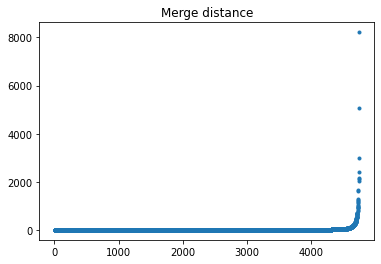

In [117]:
plt.plot(range(1,1+len(childs)), [c[-1] for c in childs], '.')
# plt.yscale('log')
# plt.xscale('log')
plt.title('Merge distance')
plt.show()

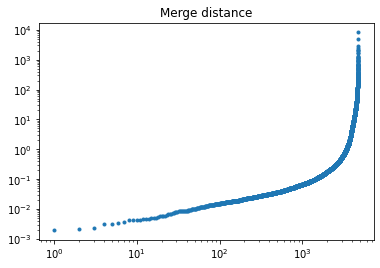

In [118]:
plt.plot(range(1,1+len(childs)), [c[-1] for c in childs], '.')
plt.yscale('log')
plt.xscale('log')
plt.title('Merge distance')
plt.show()

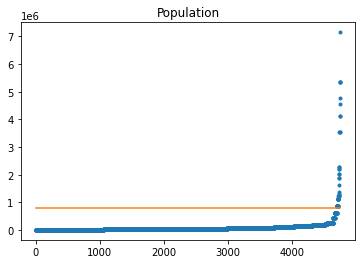

In [119]:
plt.plot(range(1,1+len(childs)), np.maximum.accumulate([c[-2] for c in childs]), '.')
plt.plot([1,1+len(childs)],[populations.sum()/9]*2)
# plt.yscale('log')
# plt.xscale('log')
plt.title('Population')
plt.show()

In [120]:
len(childs) - np.argmax( np.maximum.accumulate([c[-2] for c in childs]) > (populations.sum()/9))

52

In [121]:
print(childs[-55])
print(np.maximum.accumulate([c[-2] for c in childs])[-56])
print(populations.sum()/9)

(9012, 9284, 9454, 66525, 322.1685260606409)
629296
794611.3333333334


In [17]:
def elbow_plot(data):
    hyp = ( (data[0][0] - data[-1][0])**2 + (data[0][1] - data[-1][0])**2)**0.5
    base = data[-1][0] - data[0][0]
    height = data[-1][1] - data[0][1]
    dists = [ (1-y * hyp**2 / ( (x - data[0][0])*base * height)) * (x - data[0][0])*height / hyp if x > data[0][0] else 0 for x,y in data]
    return np.argmax(dists), dists

def elbow(data):
    hyp = ( (data[0][0] - data[-1][0])**2 + (data[0][1] - data[-1][0])**2)**0.5
    base = data[-1][0] - data[0][0]
    height = data[-1][1] - data[0][1]
    dists = [ (1-y * hyp**2 / ( (x - data[0][0])*base * height)) * (x - data[0][0])*height / hyp if x > data[0][0] else 0 for x,y in data]
    return np.argmax(dists)

def elbow2(data):
    elbowdata = np.array(data)
    if elbowdata.shape[1] != 2:
        elbowdata = elbowdata.T
    elbowdata -= elbowdata[0]
    rotation = np.linalg.inv(np.vstack([elbowdata[-1], [-elbowdata[-1,1], elbowdata[-1,0]]]).T)
    idx = np.argmin((elbowdata @rotation.T)[:,1])
    return idx

In [122]:
elb = elbow(list(enumerate([c[-1] for c in childs])))
print(elb)

4616


In [57]:
childs[0]

(2360, 2361, 4755, 3071, 0.3330176773422431)

In [19]:
dists = np.array([c[-1] for c in childs])
print(len(dists) - elb)

125


In [123]:
def process_children(array, n):
    clusters = {i: group_pops_nz[i] for i in range(len(group_pops_nz))}
    for c in array[:n+1]:
        clusters.pop(c[0])
        clusters.pop(c[1])
        clusters[c[2]] = c[3]
    return clusters

In [124]:
cls = process_children(childs, elb)
cls_pops = np.array(list(cls.values()))

In [75]:
childs[0]

(2360, 2361, 4755, 3071, 0.3330176773422431)

In [72]:
len(group_pops_nz)

4755

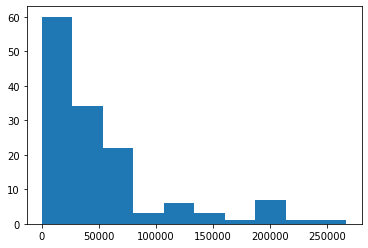

In [125]:
plt.hist(list(cls.values()))
plt.show()

In [31]:
describe_cluster(cls[0])[:10]

KeyError: 0

In [33]:
len(cls)

125

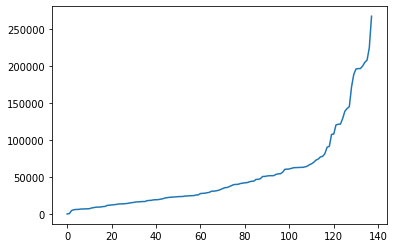

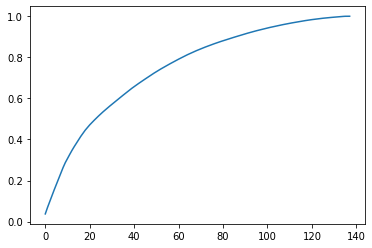

In [126]:
plt.plot(sorted(cls_pops))
plt.show()
plt.plot(np.cumsum(sorted(cls_pops)[::-1]) / cls_pops.sum())
plt.show()

In [24]:
(np.cumsum(sorted(cls_pops)[::-1]) / cls_pops.sum())[:50]

array([0.03732083, 0.06870948, 0.09746806, 0.12611225, 0.15404261,
       0.18150243, 0.20895009, 0.23633245, 0.26301692, 0.2893581 ,
       0.31335641, 0.33363341, 0.35385797, 0.37378078, 0.39318901,
       0.41014811, 0.42699436, 0.44210419, 0.45715236, 0.47189346,
       0.48468825, 0.49732126, 0.50873649, 0.5196521 , 0.53044787,
       0.54116758, 0.55156441, 0.56175905, 0.57162062, 0.58141786,
       0.59091712, 0.59995509, 0.60887587, 0.61771569, 0.62651958,
       0.63532024, 0.64410707, 0.65287865, 0.66141183, 0.66989969,
       0.67836798, 0.68629191, 0.69413628, 0.70184851, 0.70948033,
       0.71675349, 0.72402539, 0.7312819 , 0.73849228, 0.74561763])

In [25]:
def define_clusters(array, n):
    clusters = {i: {i} for i in range(len(group_pops_nz))}
    for c in array[:n+1]:
        clusters[c[2]] = {*clusters.pop(c[0]), *clusters.pop(c[1])}
    return clusters

In [127]:
cls_members = define_clusters(childs, elb)

In [128]:
import json
np.savez('arizona_coi', codes=group_codes_nz, pops=group_pops_nz, members= cls_members)

In [162]:
wag_ld = WeightedAgglomerativeClustering(30)
flat_clusts_ld = wag_ld.fit(group_std_nz, group_pops_nz)
print()
wag_cd = WeightedAgglomerativeClustering(9)
flat_clusts_cd = wag_cd.fit(group_std_nz, group_pops_nz)

 32       


In [129]:
big_clusts = sorted(cls_members.values(), key=lambda x: sum(-group_pops_nz[i] for i in x))
def interpret_cluster(clus, n=10):
    vectors = group_std_nz[list(clus)]
    titles = row_titles()
    titles = [t for i,t in enumerate(titles) if np.mean(vectors[:,i]) > 0]
    rel_cols = vectors[:,np.mean(vectors, 0) > 0]
    varis = np.std(rel_cols, axis=0)
    consts = np.argsort(varis)
    
    for i in consts[:n]:
        print(titles[i], ': ', varis[i])
    

In [115]:
interpret_cluster(big_clusts[0], n=10)

SDELM 1680 :  0.000588214343577971
SDUNI 3310 :  0.0006830360820699999
SDSEC 8340 :  0.000757054849529358
SDELM 8310 :  0.0008779360391956969
PLACE 47820 :  0.0013055756328129633
SDUNI 99999 :  0.0030755549700554738
SDELM 1380 :  0.004543759465067637
SDUNI 6070 :  0.007678078468733876
SDUNI 9310 :  0.008074787214655722
SDUNI 4820 :  0.01058143066273472


In [131]:
census_data[census_data['SDELM']==1680]

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,CIFSN,LOGRECNO,GEOID,GEOCODE,...,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
111597,PLST,AZ,750,0,0,0,0,111598,7500000US040131094011000,40131094011000,...,0,0,0,0,0,0,0,0,0,0
111598,PLST,AZ,750,0,0,0,0,111599,7500000US040131094011001,40131094011001,...,0,0,0,0,0,0,0,0,0,0
111599,PLST,AZ,750,0,0,0,0,111600,7500000US040131094011002,40131094011002,...,0,0,0,0,0,0,0,0,0,0
111600,PLST,AZ,750,0,0,0,0,111601,7500000US040131094011003,40131094011003,...,0,0,0,0,0,0,0,0,0,0
111601,PLST,AZ,750,0,0,0,0,111602,7500000US040131094011004,40131094011004,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114599,PLST,AZ,750,0,0,0,0,114600,7500000US040131125233021,40131125233021,...,0,0,0,0,0,0,0,0,0,0
114600,PLST,AZ,750,0,0,0,0,114601,7500000US040131125233022,40131125233022,...,0,0,0,0,0,0,0,0,0,0
114601,PLST,AZ,750,0,0,0,0,114602,7500000US040131125233023,40131125233023,...,0,0,0,0,0,0,0,0,0,0
114602,PLST,AZ,750,0,0,0,0,114603,7500000US040131125233024,40131125233024,...,0,0,0,0,0,0,0,0,0,0


In [154]:
def describe_cluster(clus, positive=False):
    rtitles = row_titles()
    cl_mn = np.mean(group_nml_nz[clus].T * group_pops_nz[clus], axis=1) / group_pops_nz[clus].sum()
    cl_std = np.std(group_nml_nz[clus].T * group_pops_nz[clus], axis=1) / group_pops_nz[clus].sum()
    overall_std = np.std(group_nml_nz.T * group_pops_nz, axis=1) / group_pops_nz.sum()
    rat = cl_std / overall_std
    rat[np.argwhere(np.isnan(rat))] = np.inf
    if positive:
        rat[cl_mn == 0] = np.inf
    ttypes = title_types()
    overall_mean = group_nml_nz.mean(0)
    for i,t in enumerate(rtitles):
        if ttypes[t] == 'BOOL':
            rat[i] = 1-cl_mn[i]
    print('Population: ', group_pops_nz[clus].sum())
    return sorted(zip(rtitles, rat, cl_mn, overall_mean), key=lambda x: x[1])


def describe_cluster2(clus, positive=False):
    rtitles = row_titles()
    cl_mn = (group_nml_nz[clus].T @ group_pops_nz[clus]) / group_pops_nz[clus].sum()
    overall_mn = (group_nml_nz.T @ group_pops_nz) / group_pops_nz.sum()
    rat = abs(cl_mn - overall_mn)
    ttypes = title_types()
    print('Population: ', group_pops_nz[clus].sum())
    return sorted(zip(rtitles, rat, cl_mn, overall_mn), key=lambda x: -x[1])



In [255]:
describe_cluster2(list(big_clusts[0]), positive=False)[:30]

Population:  266900


[('SDUNI 7520', 0.8809502674051503, 0.9466561594876525, 0.06570589208250217),
 ('PLACE 46000',
  0.21821704579286366,
  0.23783460305565965,
  0.019617557262795987),
 ('CBSAPCI N', 0.15060428733464007, 0.0006581912059824365, 0.1512624785406225),
 ('AIHHTLI 9', 0.09982637954799203, 0.1820436663374093, 0.08221728678941725),
 ('COUSUB 92346',
  0.09718614587908775,
  0.1820436663374093,
  0.08485752045832154),
 ('SDSEC 6330', 0.06164408904408566, 0.0, 0.06164408904408566),
 ('SDUNI 99999',
  0.06074351921016018,
  0.00029428795258694103,
  0.06103780716274712),
 ('SDSEC 09630', 0.049403985932267955, 0.0, 0.049403985932267955),
 ('PLACE 28380', 0.045880361915580814, 0.0, 0.045880361915580814),
 ('COUNTY 21.0', 0.04446657020661755, 0.0, 0.04446657020661755),
 ('PLACE 27400',
  0.034949467632912,
  0.0016756537089607723,
  0.03662512134187277),
 ('SDELM 7020', 0.03428095510083298, 0.0, 0.03428095510083298),
 ('SDUNI 3950', 0.03236754642122832, 0.0, 0.03236754642122832),
 ('PLACE 40415', 0.03

In [157]:
with codecs.open('aznames/NAMES_ST04_AZ_SDUNI.txt', 'r', 'latin-1') as file:
    sduni = pd.read_csv(file,sep='|', keep_default_na=False)
with codecs.open('aznames/NAMES_ST04_AZ_INCPLACE.txt', 'r', 'latin-1') as file:
    place = pd.read_csv(file,sep='|', keep_default_na=False)    

In [238]:
sduni[sduni['DISTRICT']==4970]

,STATEFP,DISTRICT,NAME,NAMELSAD
50,4,4970,Mesa Unified District,Mesa Unified District


In [241]:
group_pops_nz.shape

(4755,)

In [180]:
rtitles = row_titles()
bc = group_nml_nz[list(big_clusts[0])]


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00164485],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01030781],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0057433 ]])

In [183]:
rtitles.index('SDUNI 7520')

936

In [184]:
bc[:,rtitles.index('SDUNI 7520')]

array([0.94710327, 0.95049791, 0.94710327, 0.94710327, 0.94710327,
       0.94774063, 0.94710327, 0.94776099, 0.94909802, 0.94896888,
       0.94710327, 0.94782958, 0.94710327, 0.94710327, 0.94710327,
       0.94765105, 0.94710327, 0.94710327, 0.94710327, 0.94710327,
       0.94710327, 0.94769117, 0.94710327, 0.94775826, 0.9488232 ,
       0.93830276, 0.94781378, 0.9478246 , 0.94828347, 0.95056744,
       0.94710327, 0.94758872, 0.9480648 , 0.94764947, 0.948609  ,
       0.94746054, 0.94768042, 0.95236496, 0.94754772, 0.94710327,
       0.94710327, 0.94754834, 0.94843348, 0.9482842 , 0.94776328,
       0.94710327, 0.94798022, 0.94766336, 0.94766469, 0.94710327,
       0.94710327, 0.94769337, 0.94864161, 0.94877169, 0.94763386,
       0.9538804 , 0.94710327, 0.9492509 , 0.94710327, 0.94842789,
       0.94805802, 0.94889026, 0.96862835, 0.94871674, 0.94808169,
       0.95053481, 0.95008784, 0.94784262, 0.9475444 , 0.94710327,
       0.9499377 , 0.94775826, 0.9596017 , 0.6063771 , 0.95408

In [234]:
gps = block_groups[block_groups['GEOCODE'].isin([group_codes_nz[i] for i in big_clusts[0]])]
gps

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,CIFSN,LOGRECNO,GEOID,GEOCODE,...,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
3912,PLST,AZ,150,0,0,0,0,3913,1500000US040133193002,040133193002,...,10,0,0,0,0,0,10,0,0,10
4007,PLST,AZ,150,0,0,0,0,4008,1500000US040134201113,040134201113,...,0,0,0,0,0,0,0,0,0,0
4011,PLST,AZ,150,0,0,0,0,4012,1500000US040134201132,040134201132,...,0,0,0,0,0,0,0,0,0,0
4012,PLST,AZ,150,0,0,0,0,4013,1500000US040134201141,040134201141,...,0,0,0,0,0,0,0,0,0,0
4013,PLST,AZ,150,0,0,0,0,4014,1500000US040134201142,040134201142,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,PLST,AZ,150,0,0,0,0,4368,1500000US040134226382,040134226382,...,53,53,0,0,53,0,0,0,0,0
4370,PLST,AZ,150,0,0,0,0,4371,1500000US040134226393,040134226393,...,0,0,0,0,0,0,0,0,0,0
4397,PLST,AZ,150,0,0,0,0,4398,1500000US040134226532,040134226532,...,7,0,0,0,0,0,7,0,0,7
4412,PLST,AZ,150,0,0,0,0,4413,1500000US040134226601,040134226601,...,63,0,0,0,0,0,63,0,0,63


In [235]:
gps['POP100'].sum()

266900

In [211]:
def get_blocks_for_group(group):
    blocks = census_data[census_data['SUMLEV']==750]
    county_blocks = blocks[blocks['COUNTY']==group['COUNTY']]
    tract_blocks = county_blocks[county_blocks['TRACT']==group['TRACT']]
    group_blocks = tract_blocks[tract_blocks['BLKGRP']==group['BLKGRP']]
    return group_blocks

In [236]:
bg_blocks = []
for i,g in gps.iterrows():
    bg_blocks.append(get_blocks_for_group(g))

In [220]:
for (i,gp),blks in zip(gps.iterrows(), bg_blocks):
    if gp['POP100'] != blks['POP100'].sum():
        print(i, gp['POP100'], blks['POP100'].sum())

In [229]:
sduni_pops = {}
total_pop = 0
for blklist in bg_blocks:
    for i,blk in blklist.iterrows():
        sduni_pops[blk['SDUNI']] = sduni_pops.get(blk['SDUNI'],0) + blk['POP100']
        total_pop += blk['POP100']
        
print(sduni_pops)

{99999: 93646, 7170: 1217, 2690: 217, 9190: 0, 6250: 6293, 7570: 8138, 99997: 100, 4970: 127454, 3400: 10851, 6810: 4821, 3780: 8429, 1870: 5248, 7750: 4117, 3310: 22}


In [230]:
sorted(sduni_pops.items(), key=lambda x: -x[1])

[(4970, 127454),
 (99999, 93646),
 (3400, 10851),
 (3780, 8429),
 (7570, 8138),
 (6250, 6293),
 (1870, 5248),
 (6810, 4821),
 (7750, 4117),
 (7170, 1217),
 (2690, 217),
 (99997, 100),
 (3310, 22),
 (9190, 0)]

In [251]:
blkgp_info = get_info(bg_blocks[0])

In [266]:
x = np.linalg.norm(blkgp_info - group_mat, axis=1)
print(min(x))
print(sum(x==0))
print(np.argmin(x))
print(list(big_clusts[0])[0])

0.0
1
2858
1046


In [254]:
rts = row_titles()
print(blkgp_info[rts.index('SDUNI 4970')])
print(blkgp_info[rts.index('SDUNI 7520')])

0.6358885017421603
0.0


In [200]:
group= gps.iloc[0]
print(group)
print('Blocks')
blocks = census_data[census_data['SUMLEV']==750]
print(blocks)
print('County ', group['COUNTY'])
county_blocks = blocks[blocks['COUNTY']==int(group['COUNTY'])]
print(county_blocks['COUNTY'])
print('Tract ', group['TRACT'])
tract_blocks = county_blocks[county_blocks['TRACT']==int(group['TRACT'])]
print(tract_blocks['TRACT'])
print('Group ', group['BLKGRP'])
group_blocks = tract_blocks[tract_blocks['BLKGRP']==int(group['BLKGRP'])]
print(group_blocks['BLKGRP'])
print()

FILEID      PLST
STUSAB        AZ
SUMLEV       150
GEOVAR         0
GEOCOMP        0
            ... 
P0050006       0
P0050007       0
P0050008       0
P0050009       0
P0050010       0
Name: 2381, Length: 413, dtype: object
Blocks
       FILEID STUSAB  SUMLEV GEOVAR  GEOCOMP  CHARITER  CIFSN  LOGRECNO  \
57730    PLST     AZ     750      0        0         0      0     57731   
57731    PLST     AZ     750      0        0         0      0     57732   
57732    PLST     AZ     750      0        0         0      0     57733   
57733    PLST     AZ     750      0        0         0      0     57734   
57734    PLST     AZ     750      0        0         0      0     57735   
...       ...    ...     ...    ...      ...       ...    ...       ...   
213169   PLST     AZ     750      0        0         0      0    213170   
213170   PLST     AZ     750      0        0         0      0    213171   
213171   PLST     AZ     750      0        0         0      0    213172   
213172   PLST    

In [202]:
group_blocks['POP100'].sum()

1412

In [203]:
group['POP100']

1412

In [250]:
block_groups = census_data[census_data['SUMLEV']==150]

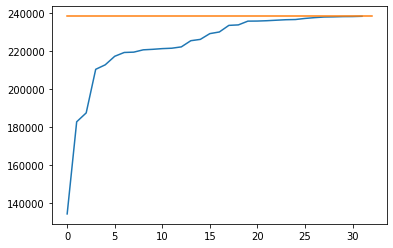

In [163]:
plt.plot(sorted([c.population for c in flat_clusts_ld.values()]))
plt.plot([0,len(flat_clusts_ld)],[sum(group_pops_nz)/30]*2)

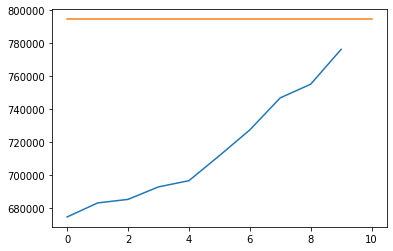

In [164]:
plt.plot(sorted([c.population for c in flat_clusts_cd.values()]))
plt.plot([0,len(flat_clusts_cd)],[sum(group_pops_nz)/9]*2)

In [165]:
np.savez('arizona_ld_cluster', mat=group_std_nz, pops=group_pops_nz, children=wag_ld.children_, geocodes=group_codes_nz)
np.savez('arizona_cd_cluster', mat=group_std_nz, pops=group_pops_nz, children=wag_cd.children_, geocodes=group_codes_nz)

In [145]:
len(flat_clusts_cd)

10

In [158]:
arizona_cd = balance2(flat_clusts_cd, 9)

In [11]:
np.savez('arizona_clusters', clusters=clusts)

In [16]:
wag = WeightedAgglomerativeClustering()
small_clust = wag.fit(group_std[clusts[18788]['members']], group_pops[clusts[18788]['members']])

c:\users\patri\miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
c:\users\patri\miniconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars


In [27]:
smcl = clusts[smclts[-1]]
smcl

{'members': [6624,
  6625,
  6626,
  6627,
  6628,
  6629,
  6630,
  6631,
  6632,
  6633,
  6644,
  6645,
  6646,
  6647,
  6634,
  6635,
  6636,
  6637,
  6642,
  6643,
  6638,
  6639,
  6640,
  6641,
  6598,
  6599,
  6600,
  6601,
  6602,
  6603,
  6608,
  6609,
  6604,
  6605,
  6606,
  6607,
  6614,
  6615,
  6610,
  6611,
  6612,
  6613,
  6616,
  6617,
  6618,
  6619,
  6620,
  6621,
  6622,
  6623,
  6656,
  6657,
  6658,
  6659,
  6648,
  6649,
  6650,
  6651,
  6652,
  6653,
  6654,
  6655,
  6664,
  6665,
  6660,
  6661,
  6662,
  6663,
  6670,
  6671,
  6672,
  6673,
  6666,
  6667,
  6668,
  6669,
  6686,
  6687,
  6682,
  6683,
  6684,
  6685,
  6678,
  6679,
  6680,
  6681,
  6674,
  6675,
  6676,
  6677,
  6688,
  6689,
  6690,
  6691,
  6692,
  6693,
  6694,
  6695,
  6696,
  6697,
  6698,
  6699,
  6700,
  6701,
  6702,
  6703,
  6704,
  6705,
  6706,
  6707,
  6708,
  6709,
  3708,
  3709,
  3710,
  3711,
  3712,
  3713,
  3714,
  3715,
  3716,
  3717,
  3692,
  369

In [160]:
np.blastoise = balance2

In [23]:
group_data.iloc[3940]['POP100']

0

In [28]:
group_data[group_data['POP100']==0]

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,CIFSN,LOGRECNO,GEOID,GEOCODE,...,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
48283,PLST,AZ,740,0,0,0,0,48284,7400000US0400100000591275999999705023,0400100000591275999999705023,...,0,0,0,0,0,0,0,0,0,0
48295,PLST,AZ,740,0,0,0,0,48296,7400000US0400100001090612999999443011,0400100001090612999999443011,...,0,0,0,0,0,0,0,0,0,0
48297,PLST,AZ,740,0,0,0,0,48298,7400000US0400100001091326999999440001,0400100001091326999999440001,...,0,0,0,0,0,0,0,0,0,0
48304,PLST,AZ,740,0,0,0,0,48305,7400000US0400100001590612999999443022,0400100001590612999999443022,...,0,0,0,0,0,0,0,0,0,0
48305,PLST,AZ,740,0,0,0,0,48306,7400000US0400100002092805999999451002,0400100002092805999999451002,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57706,PLST,AZ,740,0,0,0,0,57707,7400000US04027000P3893978999990001001,04027000P3893978999990001001,...,0,0,0,0,0,0,0,0,0,0
57707,PLST,AZ,740,0,0,0,0,57708,7400000US04027000P3993978855400005011,04027000P3993978855400005011,...,0,0,0,0,0,0,0,0,0,0
57712,PLST,AZ,740,0,0,0,0,57713,7400000US04027000P3993978999990005011,04027000P3993978999990005011,...,0,0,0,0,0,0,0,0,0,0
57713,PLST,AZ,740,0,0,0,0,57714,7400000US04027000P3993978999990006005,04027000P3993978999990006005,...,0,0,0,0,0,0,0,0,0,0


In [29]:
group_data

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,CIFSN,LOGRECNO,GEOID,GEOCODE,...,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
48281,PLST,AZ,740,0,0,0,0,48282,7400000US0400100000591071019209705021,0400100000591071019209705021,...,0,0,0,0,0,0,0,0,0,0
48282,PLST,AZ,740,0,0,0,0,48283,7400000US0400100000591071999999705021,0400100000591071999999705021,...,0,0,0,0,0,0,0,0,0,0
48283,PLST,AZ,740,0,0,0,0,48284,7400000US0400100000591275999999705023,0400100000591275999999705023,...,0,0,0,0,0,0,0,0,0,0
48284,PLST,AZ,740,0,0,0,0,48285,7400000US0400100001090612127709442011,0400100001090612127709442011,...,0,0,0,0,0,0,0,0,0,0
48285,PLST,AZ,740,0,0,0,0,48286,7400000US0400100001090612127709442021,0400100001090612127709442021,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57725,PLST,AZ,740,0,0,0,0,57726,7400000US04027000P4293978999990009071,04027000P4293978999990009071,...,0,0,0,0,0,0,0,0,0,0
57726,PLST,AZ,740,0,0,0,0,57727,7400000US04027000P4293978999990009072,04027000P4293978999990009072,...,0,0,0,0,0,0,0,0,0,0
57727,PLST,AZ,740,0,0,0,0,57728,7400000US04027000P4293978999990009074,04027000P4293978999990009074,...,0,0,0,0,0,0,0,0,0,0
57728,PLST,AZ,740,0,0,0,0,57729,7400000US04027000P4393264855400118012,04027000P4393264855400118012,...,0,0,0,0,0,0,0,0,0,0


In [30]:
group_data_nz = group_data[group_data['POP100'] > 0]
group_pops_nz = np.array(group_data_nz['POP100'].array)
group_std_nz = group_std[[i for i in range(len(group_std)) if group_data.iloc[i]['POP100'] > 0]]

In [ ]:
wag = WeightedAgglomerativeClustering(30)
clusts_nz = wag.fit(group_std_nz, group_pops_nz)